In [ ]:
# Text identification using OpenCV, Tesseract (OCR) and deep neural network

In [1]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

In [2]:
# Function to preprocess the image
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)  # Thresholding
    return binary

In [3]:
# Function to detect text regions
def detect_text_regions(image):
    # Find contours of text regions
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

In [4]:
# Function to draw bounding boxes
def draw_bounding_boxes(image, contours):
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return image

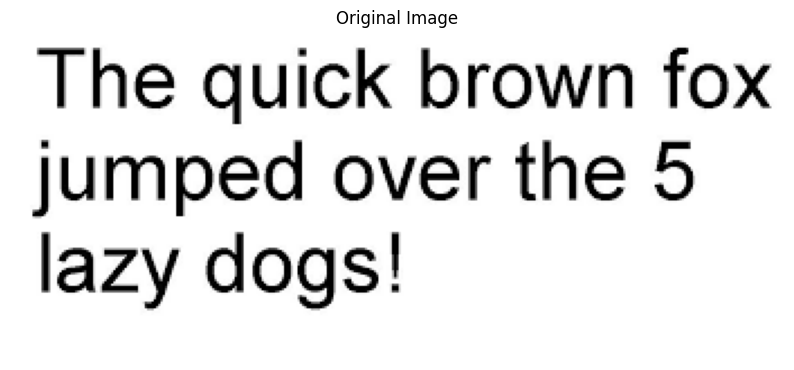

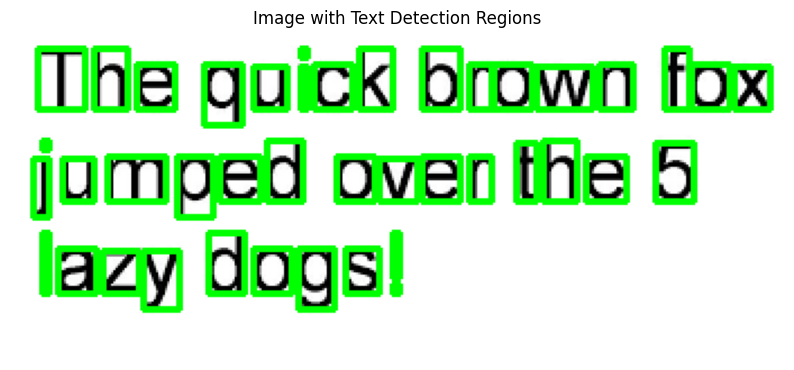


Detected Text:
The quick brown fox
jumped over the 5
lazy dogs!



In [5]:
# Load image
image_path = r"C:\Users\User\Desktop\Datasets\img1.png"
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Unable to read the image file: {image_path}")
else:
    # Display original image
    plt.figure(figsize=(10, 5))
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Preprocess the image
    preprocessed = preprocess_image(image)

    # Detect text regions
    contours = detect_text_regions(preprocessed)

    # Draw bounding boxes on the original image
    image_with_boxes = draw_bounding_boxes(image.copy(), contours)

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 5))
    plt.title("Image with Text Detection Regions")
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Extract text using Tesseract OCR
    detected_text = pytesseract.image_to_string(preprocessed)
    print("\nDetected Text:")
    print(detected_text)